In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulation results

In [2]:
from ema_workbench import (TimeSeriesOutcome, 
                           perform_experiments,
                           RealParameter, 
                           CategoricalParameter,
                           Policy,
                           ema_logging, 
                           save_results,
                           load_results)

from ema_workbench.analysis.plotting import lines, envelopes, plot_lines_with_envelopes
from ema_workbench.analysis.plotting_util import Density

C:\Users\sibel\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
C:\Users\sibel\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\sibel\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\Users\sibel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\sibel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namesp

In [3]:
directory = 'C:/Users/sibel/Dropbox/WIP/Felix/Enhanced_Weathering/Winter1920/ema/'

## Figure 1: Exploring the effect of enhanced weathering in the NDC and RET scenarios without taking managerial uncertainties into account


In [5]:
df_ref = pd.read_excel(directory+'reference.xlsx') # refeence simulation imported from Vensim

In [21]:
ylabels = {'Temperature Change from Preindustrial' : ('Temperature change','°C'),
           'Net CO2 emissions' : ('Net $CO_2$ emissions' , '$GtCO_2$ $yr^{-1}$'),
           'Total CO2 removal by weathering' : ('Total $CO_2$ removal by weathering', '$GtCO_2$ $yr^{-1}$'),
           'Cumulative basalt use' : ('Cumulative basalt use', 'Gt'),
           'Cumulative olivine use' : ('Cumulative olivine use', 'Gt'),
           'Atmospheric Concentration CO2' : ('Atmospheric concentration $CO_2$', 'ppm'),
           'Cropland Yield' : ('Average crop yield', 't $ha^{-1}$'),
           'Total Demand for Arable Land' : ('Total demand for arable land', 'M ha'),
           'Agricultural N2O Emissions' : ('Agricultural $N_{2}O$ emissions', '$TgN_{2}O$ $yr^{-1}$'),
           'Basalt application rate' : ('Basalt application rate', 'Gt $yr^{-1}$'),
           'Olivine application rate' : ('Olivine application rate', 'Gt $yr^{-1}$'),
           'Cumulative Cost of C Removal by EW' : ('Cumulative Cost of C Removal by EW', 'billion USD'),
           'Cumulative CO2 removal by weathering' : ('Cumulative CO2 removal by weathering', '$GtCO_2$')
          }

In [7]:
results = load_results(directory+'EW_explore_noManagerial_all_vNPP_2.tar.gz') # EMA results

In [24]:
#results_crop = load_results(directory+'EW_explore_noManagerial_all_vNPP_crop.tar.gz')

In [15]:
outcomes.keys()

dict_keys(['TIME', 'Total CO2 removal by weathering', 'Temperature Change from Preindustrial', 'Atmospheric Concentration CO2', 'Cropland Yield', 'Total Demand for Arable Land', 'Agricultural N2O Emissions', 'Cumulative basalt use', 'Cumulative olivine use', 'Net CO2 emissions', 'Annual cost of C removal by weathering', 'C removal by stimulation ocean biological pump'])

In [10]:
experiments, outcomes = results
oois = list(ylabels.keys())

# RESULTS IN 2000-2100
new_outcomes = {}
for key, value in outcomes.items():
    if key in ['Agricultural N2O Emissions', 'Cropland Yield']:
        value[:, 200] = value[:, 199]
    new_outcomes[key] = value[:, 100:201]

# UNIT CONVERSIONS
new_outcomes['Net CO2 emissions'] = new_outcomes['Net CO2 emissions']/(1e+09) # ton to Gton
new_outcomes['Total CO2 removal by weathering'] = new_outcomes['Total CO2 removal by weathering']/(1e+09) # ton to Gton
new_outcomes['Cumulative basalt use'] = new_outcomes['Cumulative basalt use']/(1e+09) # ton to Gton
new_outcomes['Cumulative olivine use'] = new_outcomes['Cumulative olivine use']/(1e+09) # ton to Gton
new_outcomes['Agricultural N2O Emissions'] = new_outcomes['Agricultural N2O Emissions']*(1e+03) # Gton to Tg
new_outcomes['Total Demand for Arable Land'] = new_outcomes['Total Demand for Arable Land']/(1e+06) # ha to M ha

In [24]:
# CUMULATIVE CO2 removal
for trs in [1, 2]:
    logical_index = experiments['Transition Scenario Switch']==trs
    out = new_outcomes['Total CO2 removal by weathering'][logical_index]
    print(out.shape)
    cum = np.sum(out, axis=1)
    print(cum.shape)
    print("Transition {} min, max, mean: ".format(trs), cum.min(), cum.max(), np.mean(cum))


(5000, 101)
(5000,)
Transition 1 min, max, mean:  201.461273504 1290.4964428799997 813.841140292352
(5000, 101)
(5000,)
Transition 2 min, max, mean:  214.667472256 1273.7934988799998 809.9033877006719


In [11]:
experiments.columns

Index(['Basalt dr 10', 'Basalt dr 2', 'Basalt dr 20', 'Basalt dr 50',
       'Dunite dr 10', 'Dunite dr 2', 'Dunite dr 20', 'Dunite dr 50',
       'N2O emission reduction factor',
       'Temperate regions weathering correction', 'Transition Scenario Switch',
       'Unit C sequestration by alkalinity', 'Unit CO2 absorption Basalt',
       'Unit CO2 absorption Olivine', 'Unit cost of CO2 removal by basalt',
       'Unit cost of CO2 removal by olivine',
       'Warm regions weathering correction', 'a NPP', 'b NPP', 'c NPP',
       'scenario_id', 'policy', 'model'],
      dtype='object')

Temperature Change from Preindustrial


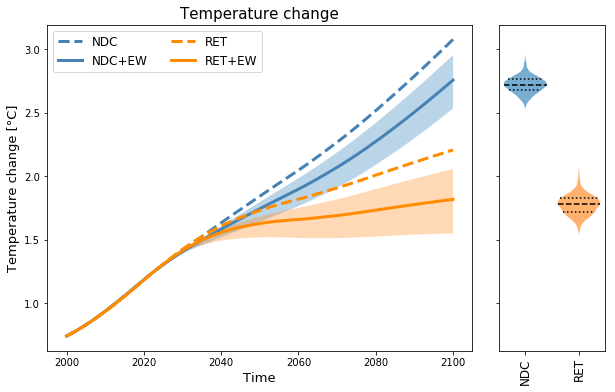

Net CO2 emissions


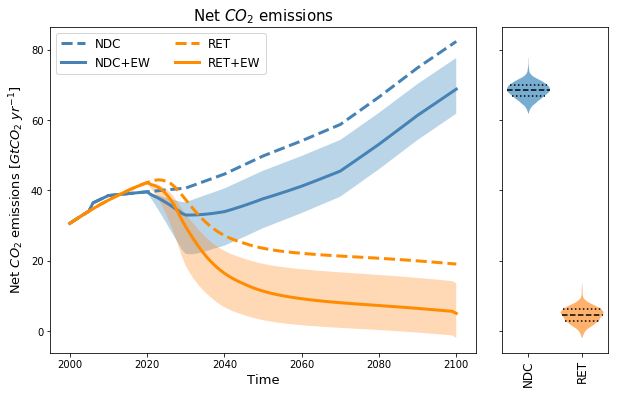

Total CO2 removal by weathering


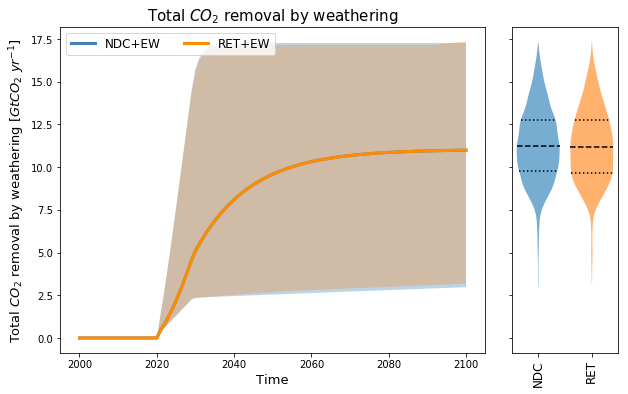

Cumulative basalt use


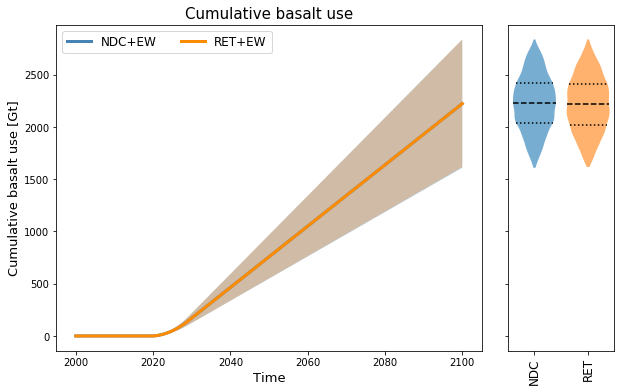

Cumulative olivine use


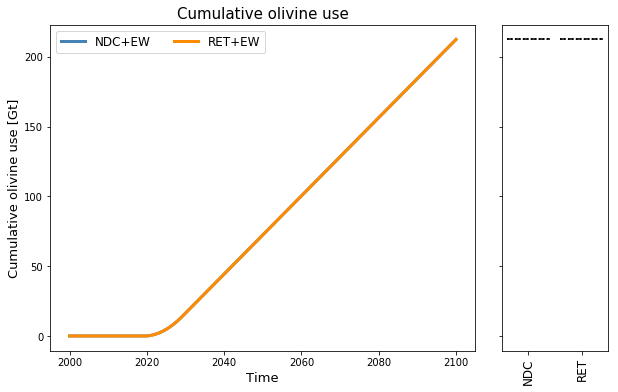

Atmospheric Concentration CO2


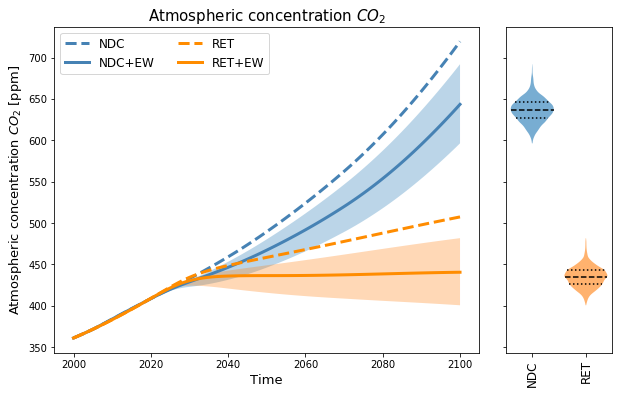

Cropland Yield


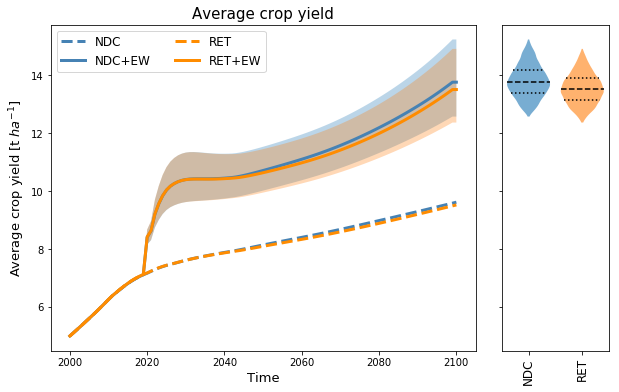

Total Demand for Arable Land


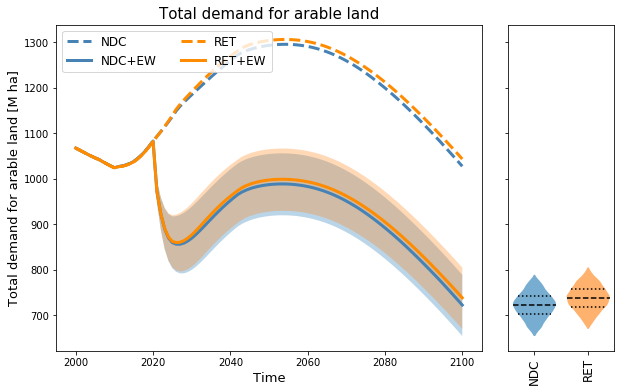

Agricultural N2O Emissions


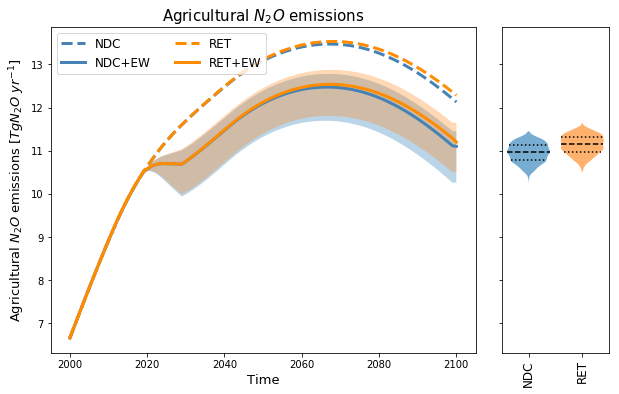

In [20]:
#fig, axes = plt.subplots(2,2,sharex=True)
to_plot = ['Net CO2 emissions', 'Temperature Change from Preindustrial', 'Total Demand for Arable Land', 'Agricultural N2O Emissions']
# plot ref ndc, ret, ndc_ew, ret_ew
# plot envelope
refs = {}
colors = {'NDC': 'steelblue', 
          'RET': 'darkorange'}    
for ooi in oois:
    
    fig, axes = envelopes(experiments, new_outcomes, ooi, 
                          density=Density.VIOLIN, legend=False, fill=True, group_by='Transition Scenario Switch')
    fig.set_size_inches(10,6)
    print(ooi)
    
    for sc in ['NDC', 'RET', 'NDC_EW_G50_NPP', 'RET_EW_G50_NPP']:
        ref = df_ref[(df_ref['Variable']==ooi) & (df_ref['Scenario']==sc)].T
        ref = ref.drop(['Variable', 'Scenario'], axis=0)
        ref = ref.loc[yrs,]
        ref = ref.fillna(0)
        if ooi.startswith('Net'):
            ref = ref / (1e+09) # ton to Gton
        elif ooi.startswith('Total Demand'):
            ref = ref / (1e+06) # ha to Mha
        elif ooi.startswith('Agr'):
            ref = ref*(1e+03) # Gton to Tg
        elif ooi.startswith('Total CO2'):
            ref = ref/(1e+09) # ton to Gton
        elif ooi.startswith('Cumulative'):
            ref = ref/(1e+09) # ton to Gton
        refs[sc] = ref
    if ooi in ['Cumulative basalt use', 'Cumulative olivine use', 'Total CO2 removal by weathering']:
        axes[ooi].plot(refs['NDC_EW_G50_NPP'], label='NDC+EW', lw=3, ls='-', color=colors['NDC'])
        axes[ooi].plot(refs['RET_EW_G50_NPP'], label='RET+EW', lw=3, ls='-', color=colors['RET'])
    else:
        axes[ooi].plot(refs['NDC'], label='NDC', lw=3, ls='--', color=colors['NDC'])
        axes[ooi].plot(refs['NDC_EW_G50_NPP'], label='NDC+EW', lw=3, ls='-', color=colors['NDC'])
        axes[ooi].plot(refs['RET'], label='RET', lw=3, ls='--', color=colors['RET'])
        axes[ooi].plot(refs['RET_EW_G50_NPP'], label='RET+EW', lw=3, ls='-', color=colors['RET'])
    
    #make_legend(grouping_labels, axes[ooi], alpha=0.6, legend_type=PATCH, ncol=2)
    axes[ooi].legend(ncol=2, loc='upper left', fontsize=12)
    
    axes[ooi].set_xlabel("Time", fontsize=13)
    axes['{}_density'.format(ooi)].set_xticks([0, 1])
    axes['{}_density'.format(ooi)].set_xticklabels(['NDC', 'RET'], fontsize=12)
    axes[ooi].set_ylabel("{} [{}]".format(ylabels[ooi][0], ylabels[ooi][1]), fontsize=13)
    axes[ooi].set_title(ylabels[ooi][0], fontsize=15)
    plt.savefig(directory+'Envelopes_{}_v2.png'.format(ooi), dpi=300,  bbox_inches='tight')

    plt.show()

In [108]:
new_outcomes['Agricultural N2O Emissions'].shape

(20000, 101)

In [23]:
#for each ooi, min, max, mean and median in 2100
ranges = pd.DataFrame(columns=['Ooi','Scenario', 'min', 'max', 'mean', 'median'] )
i = 0
for ooi in oois:
    for sc in [1, 2]:
        logicalindex = experiments['Transition Scenario Switch'] == sc
        ranges.loc[i, 'Ooi'] = ooi
        ranges.loc[i, 'Scenario'] = sc
        ranges.loc[i, 'min'] = new_outcomes[ooi][logicalindex,-1].min()
        ranges.loc[i, 'max'] = new_outcomes[ooi][logicalindex,-1].max()
        ranges.loc[i, 'mean'] = new_outcomes[ooi][logicalindex,-1].mean()
        ranges.loc[i, 'median'] = np.median(new_outcomes[ooi][logicalindex,-1])
        i += 1

ranges.to_excel(directory+'Ranges_explore_NoManagerial_All.xlsx')

# Figure 2: Contribution of different application areas (cropland, coast and forests)

In [19]:
# load the individual results
res_crop = load_results(directory+'EW_explore_noManagerial_cropland_2.tar.gz')
res_coast = load_results(directory+'EW_explore_noManagerial_coast_2.tar.gz')
res_forest = load_results(directory+'EW_explore_noManagerial_forest_2.tar.gz')


In [20]:
exp, out_crop = res_crop
exp, out_coast = res_coast
exp, out_forest = res_forest 

In [21]:
# cut the outcomes and cumulative co2 removal
new_outcrop = out_crop['Total CO2 removal by weathering'][:, 100:201]/(1e+09)
new_outforest = out_forest['Total CO2 removal by weathering'][:, 100:201]/(1e+09)
new_outcoast = out_coast['Total CO2 removal by weathering'][:, 100:201]/(1e+09)
new_outocean = out_coast['C removal by stimulation ocean biological pump'][:, 100:201]/(1e+09)

In [25]:
print(new_outcoast[:,-1].min(), new_outcoast[:,-1].mean(), new_outcoast[:,-1].max())

2.240033792 2.6599997531648 3.07996288


In [29]:
logical_index = exp['Transition Scenario Switch']==2

out = new_outcoast[logical_index]
print(out.shape)
cum = np.sum(out, axis=1)
print(cum.min(), cum.mean(), cum.max())

(5000, 101)
170.38449648 202.0645214951808 234.52151603200005


In [30]:
out = new_outforest[logical_index]
print(out.shape)
cum = np.sum(out, axis=1)
print(cum.min(), cum.mean(), cum.max())

(5000, 101)
0.20636147269628902 4.0488154780902175 5.831875599999999


In [31]:
out = new_outocean[logical_index]
print(out.shape)
cum = np.sum(out, axis=1)
print(cum.min(), cum.mean(), cum.max())

(5000, 101)
26.643735511999992 53.114524040288806 79.89708225600003


In [67]:
mintot = new_outcrop[:,-1].min() + new_outforest[:,-1].min() + new_outcoast[:,-1].min() + new_outocean[:,-1].min()
maxtot = new_outcrop[:,-1].max() + new_outforest[:,-1].max() + new_outcoast[:,-1].max() + new_outocean[:,-1].max()

print(mintot, maxtot)

3.0405147712500002 18.84247032


The results of application to all areas is min 3.04, max 18.84. There is some discrepancy, could be because of sampling. So, I take them equivalent.

crop
forest
coast
ocean


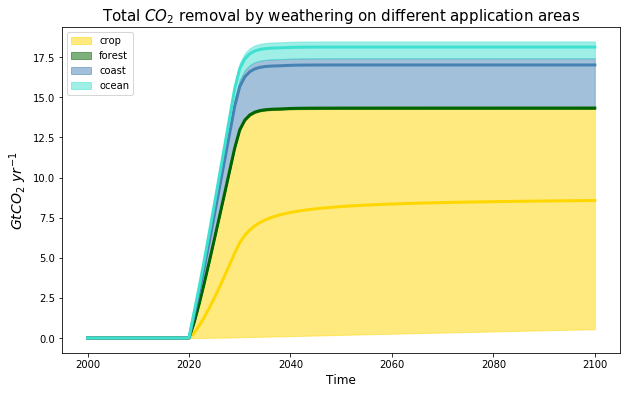

crop
forest
coast
ocean


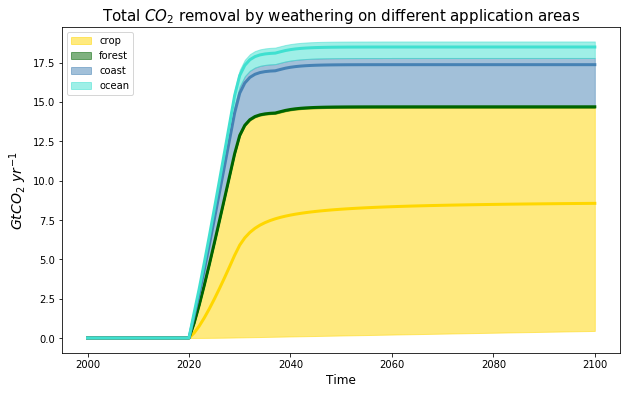

In [69]:
outs = {'crop' : new_outcrop,
        'forest' : new_outforest,
        'coast' : new_outcoast,
        'ocean' : new_outocean}
colors = {'crop' : 'gold',
        'forest' : 'darkgreen',
        'coast' : 'steelblue',
         'ocean' : 'turquoise'}

for trs in [1, 2]:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    logical_index = exp['Transition Scenario Switch']==trs
    to_plot = []
    labels = []
    prevmean = np.zeros(101)
    prevmax = np.zeros(101) 
    for area, out in outs.items():
        print(area)
        out = out[logical_index]
        omin = out.min(axis=0)
        omax = out.max(axis=0)
        omean = out.mean(axis=0)
        
        
        if area=='crop':
            ax.plot(yrs, omean, lw=3, color=colors[area])
            ax.fill_between(yrs, omin, omax, color=colors[area], alpha=0.5, label=area)
        else:
            ax.plot(yrs, prevmax+omean, lw=3, color=colors[area])
            ax.fill_between(yrs, prevmax, omax+prevmax, color=colors[area], alpha=0.5, label=area)
        
        prevmax = omax+prevmax
        prevmean = omean+prevmean
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel('$GtCO_2$ $yr^{-1}$', fontsize=14)
    ax.set_title('Total $CO_2$ removal by weathering on different application areas', fontsize=15)
    ax.legend(loc='upper left')
    plt.savefig(directory+'stackedTimeline.png', dpi=300)
    plt.show()

    

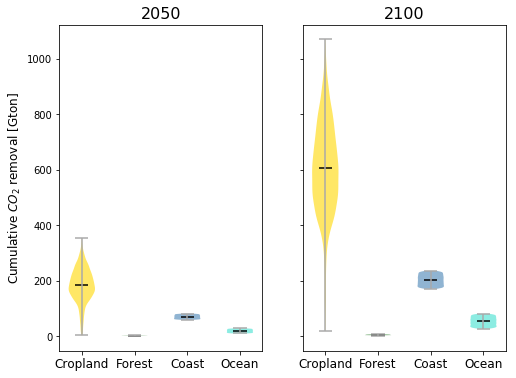

In [72]:
fig, axes = plt.subplots(1,2,sharey=True)
fig.set_size_inches(8, 6)
logical_index = exp['Transition Scenario Switch']==2
#df50 = pd.DataFrame(index=outs.keys(), columns=['min', 'max', 'mean'])
#bar plot of cumulative co2 removal by 2050, 2100

for i,t in enumerate([51, 101]):
    data = []
    for area, out in outs.items():
        out = out[logical_index][:, :t]
        cum = np.sum(out, axis=1)
        data.append(cum)
    
    parts = axes[i].violinplot(data, showmeans=True, showmedians=False, showextrema=True,)
    for j, pc in enumerate(parts['bodies']):
        pc.set_facecolor(list(colors.values())[j])
        pc.set_alpha(.6)
    parts['cbars'].set_color('darkgrey')
    parts['cmeans'].set_color('black')
    parts['cmins'].set_color('darkgrey')
    parts['cmaxes'].set_color('darkgrey')
    axes[i].set_title(yrs[t-1], fontsize=16)
    axes[i].set_xticks([1, 2, 3, 4])
    axes[i].set_xticklabels(['Cropland', 'Forest', 'Coast', 'Ocean'], fontsize=12)

    
axes[0].set_ylabel('Cumulative $CO_2$ removal [Gton]', fontsize=12)
plt.savefig(directory+'CumulativeArea.png', dpi=300)
plt.show()

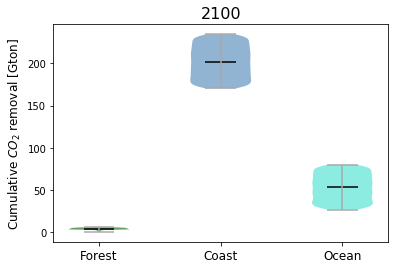

In [76]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
logical_index = exp['Transition Scenario Switch']==2

data = []
for area, out in outs.items():
    if area != 'crop':
        out = out[logical_index][:, :t]
        cum = np.sum(out, axis=1)
        data.append(cum)

parts = ax.violinplot(data, showmeans=True, showmedians=False, showextrema=True,)
for j, pc in enumerate(parts['bodies']):
    pc.set_facecolor(list(colors.values())[1:][j])
    pc.set_alpha(.6)
parts['cbars'].set_color('darkgrey')
parts['cmeans'].set_color('black')
parts['cmins'].set_color('darkgrey')
parts['cmaxes'].set_color('darkgrey')
ax.set_title(yrs[t-1], fontsize=16)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Forest', 'Coast', 'Ocean'], fontsize=12)

    
ax.set_ylabel('Cumulative $CO_2$ removal [Gton]', fontsize=12)
plt.savefig(directory+'CumulativeArea_zoomedin.png', dpi=300)
plt.show()

# Figure 3: Exploring the effect of managerial uncertainties in addition to geophysical ones


Managerial uncertainties being:

- Normal rock (basalt) application to cropland, which was assumed to be 50 ton/ha before

- Normal rock (olivine) application to coastal zone, which was also assumed to be 50 ton/ha

- Fraction of cropland used for basalt application (was 100%)

- Fraction of coastal zone used for olivine application (was 2%)

In [8]:
res_mng = load_results(directory+'EW_explore_Managerial_vNPP_2.tar.gz')

In [9]:
exp, out = res_mng

new_outcomes = {}
for key, value in out.items():
    if key in ['Agricultural N2O Emissions', 'Cropland Yield']:
        value[:, 200] = value[:, 199]
    new_outcomes[key] = value[:, 100:201]

# UNIT CONVERSIONS
#new_outcomes['Net CO2 emissions'] = new_outcomes['Net CO2 emissions']/(1e+09) # ton to Gton
new_outcomes['Total CO2 removal by weathering'] = new_outcomes['Total CO2 removal by weathering']/(1e+09) # ton to Gton
new_outcomes['Cumulative basalt use'] = new_outcomes['Cumulative basalt use']/(1e+09) # ton to Gton
new_outcomes['Cumulative olivine use'] = new_outcomes['Cumulative olivine use']/(1e+09) # ton to Gton
new_outcomes['Agricultural N2O Emissions'] = new_outcomes['Agricultural N2O Emissions']*(1e+03) # Gton to Tg
new_outcomes['Total Demand for Arable Land'] = new_outcomes['Total Demand for Arable Land']/(1e+06) # ha to M ha

In [10]:
oois = list(new_outcomes.keys())

No handles with labels found to put in legend.


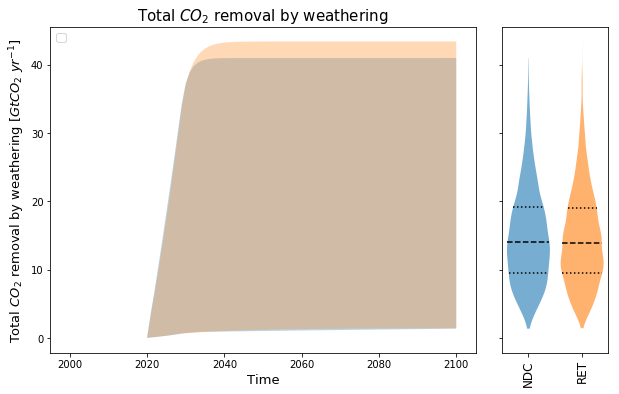

No handles with labels found to put in legend.


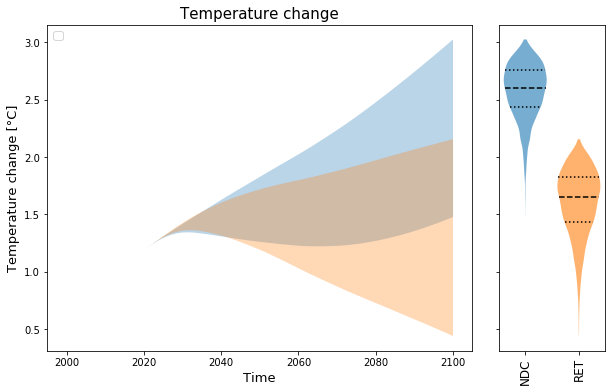

No handles with labels found to put in legend.


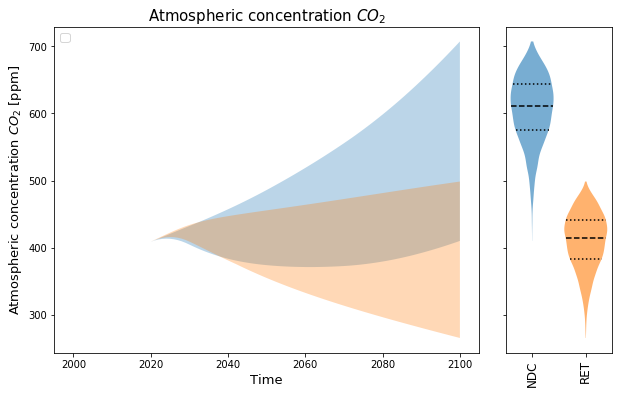

No handles with labels found to put in legend.


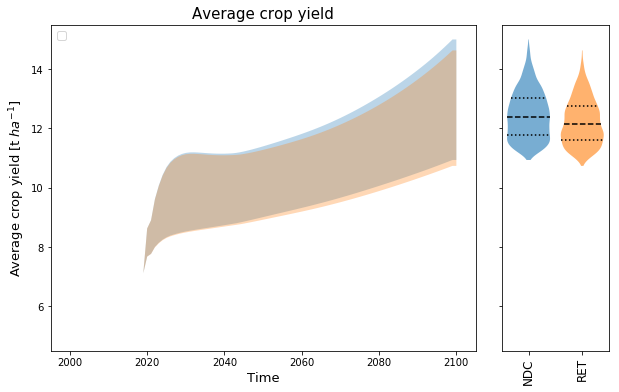

No handles with labels found to put in legend.


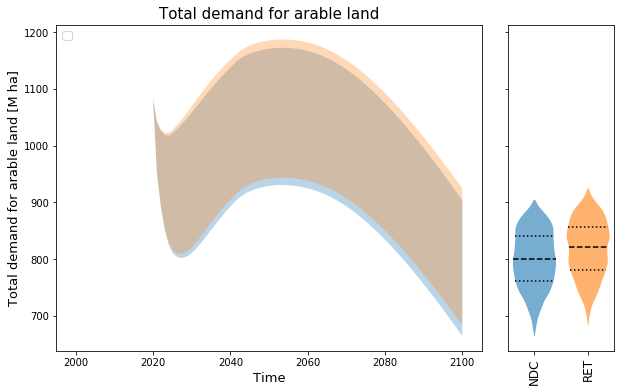

No handles with labels found to put in legend.


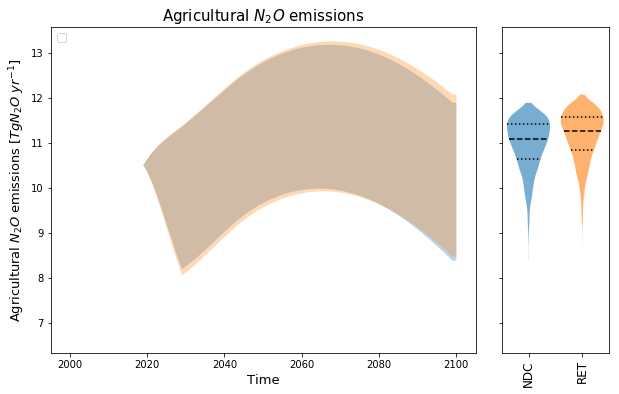

No handles with labels found to put in legend.


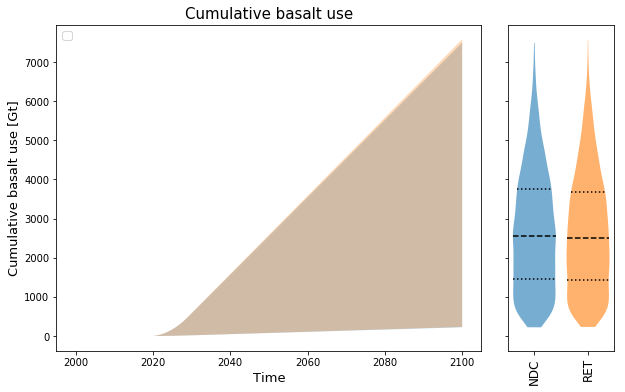

No handles with labels found to put in legend.


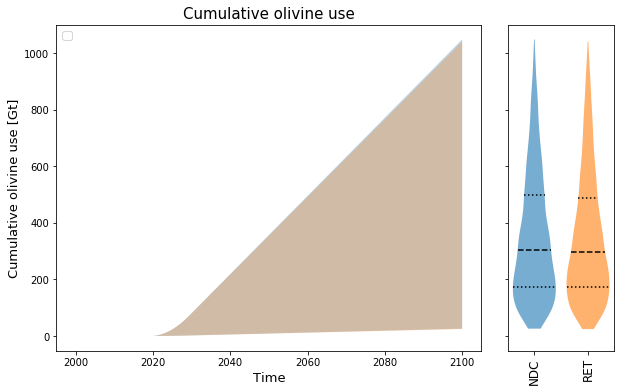

No handles with labels found to put in legend.


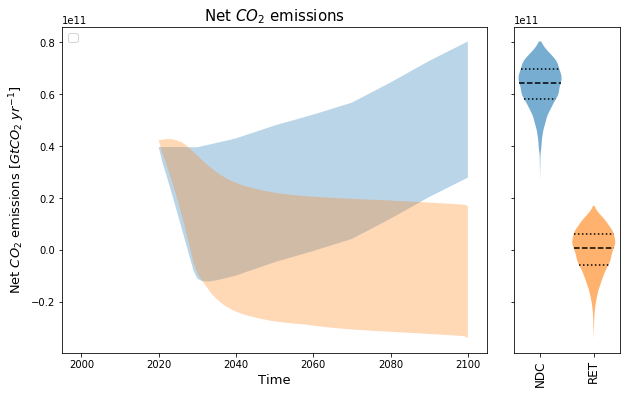

No handles with labels found to put in legend.


KeyError: 'Annual cost of C removal by weathering'

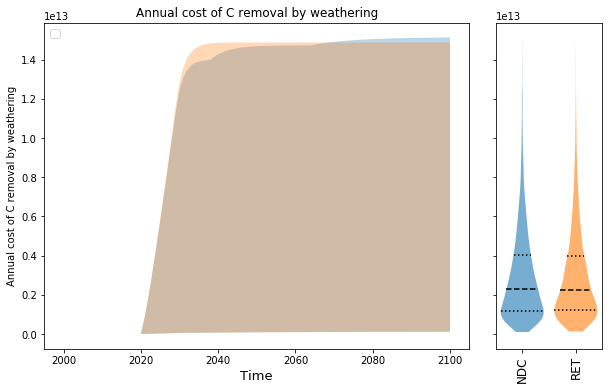

In [13]:
colors = {'NDC': 'steelblue', 
          'RET': 'darkorange'}    
for ooi in oois:
    if ooi != 'TIME':
        fig, axes = envelopes(exp, new_outcomes, ooi, 
                              density=Density.VIOLIN, legend=False, fill=True, group_by='Transition Scenario Switch')
        fig.set_size_inches(10,6)


        axes[ooi].legend(ncol=2, loc='upper left', fontsize=12)

        axes[ooi].set_xlabel("Time", fontsize=13)
        axes['{}_density'.format(ooi)].set_xticks([0, 1])
        axes['{}_density'.format(ooi)].set_xticklabels(['NDC', 'RET'], fontsize=12)
        axes[ooi].set_ylabel("{} [{}]".format(ylabels[ooi][0], ylabels[ooi][1]), fontsize=13)
        axes[ooi].set_title(ylabels[ooi][0], fontsize=15)
        plt.savefig(directory+'Envelopes_Managerial_{}.png'.format(ooi), dpi=300,  bbox_inches='tight')

        plt.show()

In [14]:
new_outcomes['Cumulative basalt use'][:, -1].max()

7574.870032384

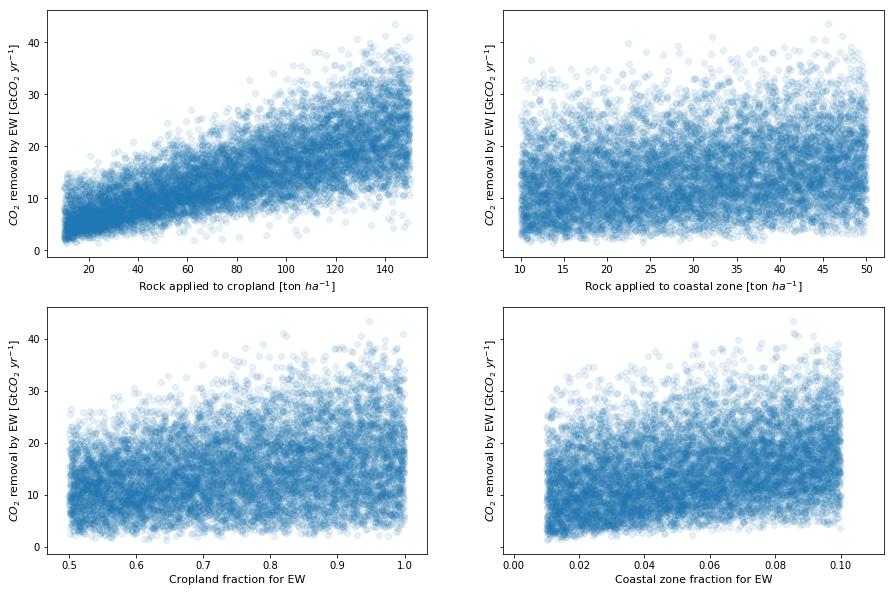

In [6]:
mng_unc = {'Fraction of coastal zone for EW' : (1, 1, 'Coastal zone fraction for EW'),
          'Normal rock per ha coastal zone' : (0, 1, 'Rock applied to coastal zone [ton $ha^{-1}$]'), 
           'Normal rock per ha cropland' : (0, 0, 'Rock applied to cropland [ton $ha^{-1}$]'),
           'Tropical cropland fraction for weathering' : (1, 0, 'Cropland fraction for EW')}

# scatter plot for co2 removal vs. 4 uncertainties in a 2x2 grid

fig, axes = plt.subplots(2,2, sharey=True)
fig.set_size_inches(15,10)
y = new_outcomes['Total CO2 removal by weathering'][:,-1]

for key, value in mng_unc.items():
    i = value[0]
    j = value[1]
    xlabel = value[2]
    ax = axes[i, j]
    x = exp[key]
    
    ax.scatter(x,y, alpha=0.1)
    ax.set_xlabel(xlabel, fontsize=11)
    ax.set_ylabel('$CO_2$ removal by EW [Gt$CO_2$ $yr^{-1}$]', fontsize=11)

plt.show()

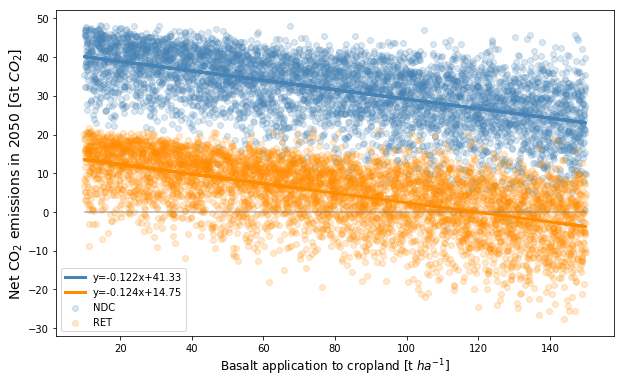

In [18]:
mng_unc = {'Fraction of coastal zone for EW' : (1, 1, 'Coastal zone fraction for EW'),
          'Normal rock per ha coastal zone' : (0, 1, 'Rock applied to coastal zone [ton $ha^{-1}$]'), 
           'Normal rock per ha cropland' : (0, 0, 'Rock applied to cropland [ton $ha^{-1}$]'),
           'Tropical cropland fraction for weathering' : (1, 0, 'Cropland fraction for EW')}

#'Normal rock per ha forests', 

# scatter plot for co2 removal vs. 4 uncertainties in a 2x2 grid
import statsmodels.api as sm

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
y = []
x = []
for trs in [1, 2]:
    log_index = exp['Transition Scenario Switch']==trs
    #y.append(new_outcomes['Temperature Change from Preindustrial'][log_index][:,-1])
    y.append(new_outcomes['Net CO2 emissions'][log_index][:,51]/1e+09)
    x.append(exp[log_index]['Normal rock per ha cropland'])


#x = exp['Normal rock per ha cropland']
    
ax.scatter(x[0],y[0], alpha=0.2, c='steelblue', label='NDC')
res1 = sm.OLS(y[0],sm.add_constant(x[0])).fit()
l1 = 'y={0:.3f}x+{1:.2f}'.format(res1.params[1], res1.params[0])
ax.plot(x[0], x[0]*res1.params[1] + res1.params[0], color='steelblue', lw=3, label=l1)
#print(res1.summary())

ax.scatter(x[1],y[1], alpha=0.2, c='darkorange', label='RET')
res2 = sm.OLS(y[1],sm.add_constant(x[1])).fit()
l2 = 'y={0:.3f}x+{1:.2f}'.format(res2.params[1], res2.params[0])
ax.plot(x[1], x[1]*res2.params[1] + res2.params[0], color='darkorange', lw=3, label=l2)

plt.hlines(y=0, xmin=10, xmax=150, color='grey', alpha=.6)

#ax.set_ylabel('Temperature Change in 2100 [$^\circ$C]', fontsize=12)
ax.set_ylabel('Net CO$_2$ emissions in 2050 [Gt $CO_2$]', fontsize=14)
ax.set_xlabel('Basalt application to cropland [t $ha^{-1}$]', fontsize=12)
ax.legend()
plt.savefig(directory+'EmisvsRock.png', dpi=300)
plt.show()

In [12]:
res2.params

const                          1.938299
Normal rock per ha cropland   -0.004161
dtype: float64

In [13]:
ind = out['Temperature Change from Preindustrial'][log_index][:, -1] <= 1.5
ind.shape
ind.sum()

66

## PRIM for 1.5 Degree scenarios incl. Managerial uncertainties

In [12]:
from ema_workbench.analysis import prim

log_index = exp['Transition Scenario Switch']==2
x = exp[log_index]
# RET scenario
data = out['Temperature Change from Preindustrial'][log_index]
y = data[:,-1] <= 1.5
print("there are {} scenarios of interest.".format(sum(y)))

prim_obj = prim.Prim(x, y, threshold=0.8)


there are 66 scenarios of interest.


**See EW_prim.py**

In [ ]:
box1.show_tradeoff()
plt.show()

# Figure 4: Deployment pathways for 1.5 degree 

In [4]:
res_goal = load_results(directory+'EW_goalseeking_2k.tar.gz')

In [5]:
exp_goal, out_goal = res_goal


In [6]:
new_outcomes_goal = {}
for key, value in out_goal.items():
    if key in ['Agricultural N2O Emissions', 'Cropland Yield', 'Basalt application rate', 'Olivine application rate']:
        value[:, 200] = value[:, 199]
    #if key != 'TIME':
    new_outcomes_goal[key] = value[:, 100:201]

# UNIT CONVERSIONS
new_outcomes_goal['Net CO2 emissions'] = new_outcomes_goal['Net CO2 emissions']/(1e+09) # ton to Gton
new_outcomes_goal['Total CO2 removal by weathering'] = new_outcomes_goal['Total CO2 removal by weathering']/(1e+09) # ton to Gton
new_outcomes_goal['Basalt application rate'] = new_outcomes_goal['Basalt application rate']/(1e+09) # ton to Gton
new_outcomes_goal['Olivine application rate'] = new_outcomes_goal['Olivine application rate']/(1e+09) # ton to Gton
new_outcomes_goal['Agricultural N2O Emissions'] = new_outcomes_goal['Agricultural N2O Emissions']*(1e+03) # Gton to Tg
new_outcomes_goal['Total Demand for Arable Land'] = new_outcomes_goal['Total Demand for Arable Land']/(1e+06) # ha to M ha
new_outcomes_goal['Cumulative Cost of C Removal by EW'] = new_outcomes_goal['Cumulative Cost of C Removal by EW']/(1e+09) #usd to billion usd

In [6]:
df_ref = pd.read_excel(directory+'reference.xlsx', sheet_name='Sheet2') # import the reference simulation from Vensim

### Pathways in the NDC and RET scenarios

Basalt application rate


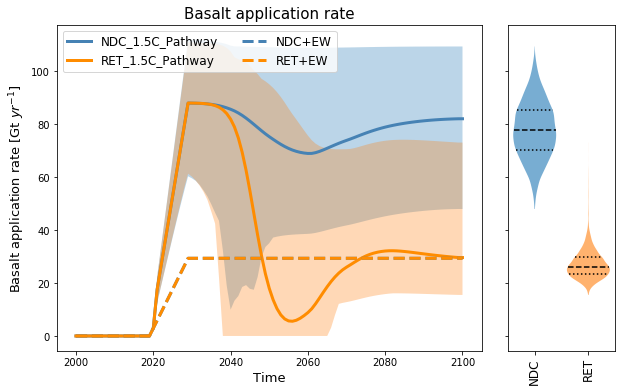

Olivine application rate


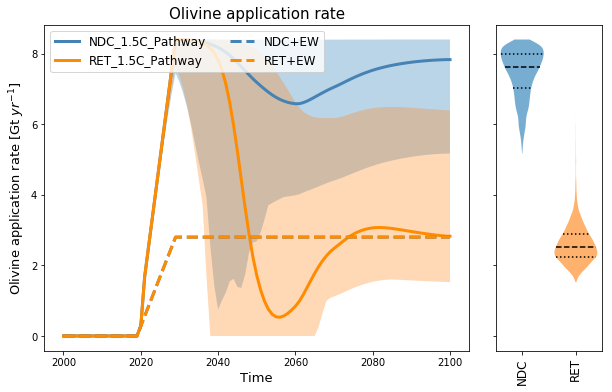

Total CO2 removal by weathering


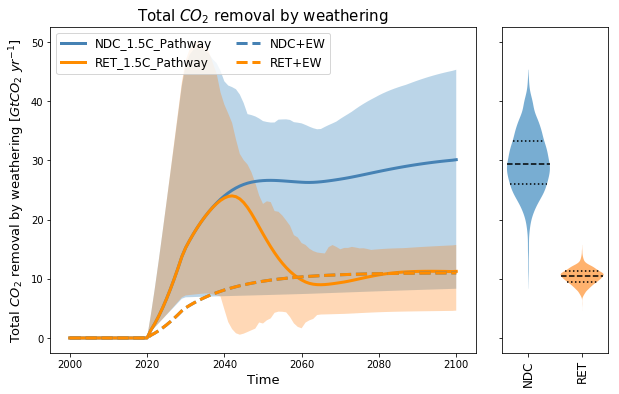

Temperature Change from Preindustrial


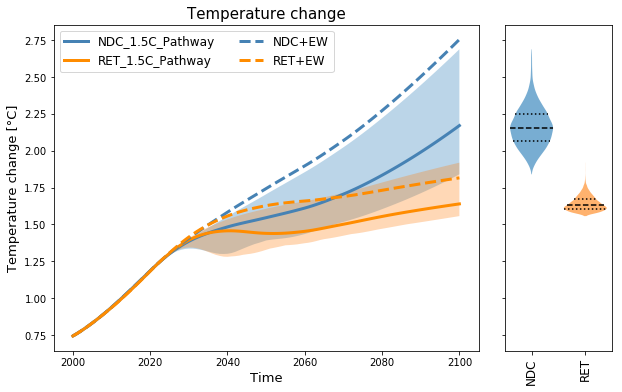

Cumulative Cost of C Removal by EW


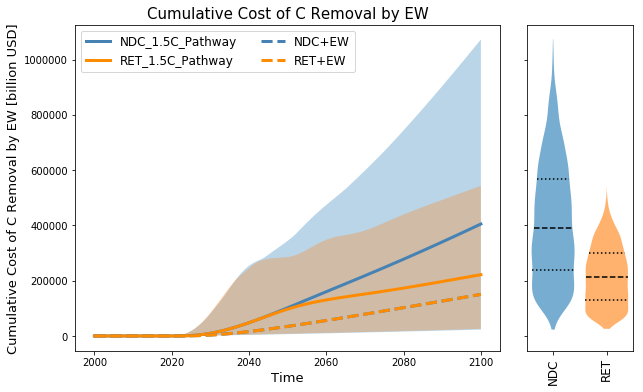

In [82]:
refs = {}
colors = {'NDC': 'steelblue', 
          'RET': 'darkorange'}   
to_plot = ['Basalt application rate', 'Olivine application rate', 
           'Total CO2 removal by weathering', 'Temperature Change from Preindustrial',
           'Cumulative Cost of C Removal by EW']
oois = [ooi for ooi in new_outcomes.keys() if ooi != 'TIME']
yrs = np.arange(2000, 2101, 1)

for ooi in to_plot:
    
    fig, axes = envelopes(exp, new_outcomes, ooi, 
                          density=Density.VIOLIN, legend=False, fill=True, group_by='Transition Scenario Switch')
    fig.set_size_inches(10,6)
    print(ooi)
    
    for sc in ['NDC_EW', 'RET_EW', 'NDC_EW_GoalSeeking', 'RET_EW_GoalSeeking']:
        ref = df_ref[(df_ref['Variable']==ooi) & (df_ref['Scenario']==sc)].T
        ref = ref.drop(['Variable', 'Scenario'], axis=0)
        ref = ref.loc[yrs,]
        ref = ref.fillna(0)
        if ooi.startswith('Net'):
            ref = ref / (1e+09) # ton to Gton
        elif ooi.startswith('Total Demand'):
            ref = ref / (1e+06) # ha to Mha
        elif ooi.startswith('Agr'):
            ref = ref*(1e+03) # Gton to Tg
        elif ooi.startswith('Total CO2'):
            ref = ref/(1e+09) # ton to Gton
        elif ooi.startswith('Cumulative') or ooi.startswith('Basalt') or ooi.startswith('Olivine'):
            ref = ref/(1e+09) # ton to Gton
        refs[sc] = ref
    axes[ooi].plot(refs['NDC_EW_GoalSeeking'], label='NDC_1.5C_Pathway', lw=3, ls='-', color=colors['NDC'])
    axes[ooi].plot(refs['RET_EW_GoalSeeking'], label='RET_1.5C_Pathway', lw=3, ls='-', color=colors['RET'])

    axes[ooi].plot(refs['NDC_EW'], label='NDC+EW', lw=3, ls='--', color=colors['NDC'])
    axes[ooi].plot(refs['RET_EW'], label='RET+EW', lw=3, ls='--', color=colors['RET'])
    
    
    #make_legend(grouping_labels, axes[ooi], alpha=0.6, legend_type=PATCH, ncol=2)
    axes[ooi].legend(ncol=2, loc='upper left', fontsize=12)
    
    axes[ooi].set_xlabel("Time", fontsize=13)
    axes['{}_density'.format(ooi)].set_xticks([0, 1])
    axes['{}_density'.format(ooi)].set_xticklabels(['NDC', 'RET'], fontsize=12)
    axes[ooi].set_ylabel("{} [{}]".format(ylabels[ooi][0], ylabels[ooi][1]), fontsize=13)
    axes[ooi].set_title(ylabels[ooi][0], fontsize=15)
    plt.savefig(directory+'Envelopes_Pathways_{}.png'.format(ooi), dpi=300,  bbox_inches='tight')

    plt.show()

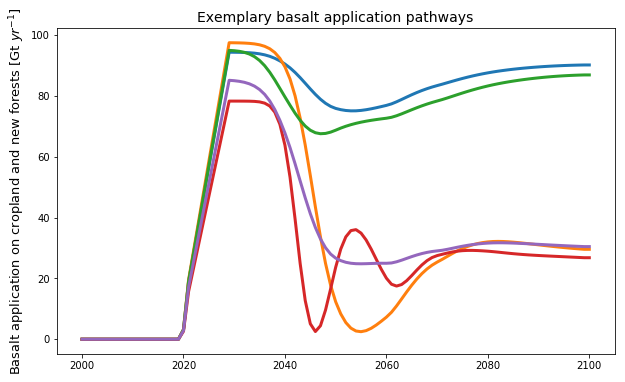

In [106]:
# Lines for basalt application 

log_index = exp['Transition Scenario Switch'] == 2
new_outcomes2 = {}

# random selection
indices = range(0, 5000)
to_select = 5
import random
selected_indices = random.sample(indices, to_select)
log_index2 = np.zeros(5000, dtype=bool)
for i in selected_indices:
    log_index2[i] = True

fig, ax = plt.subplots()
fig.set_size_inches(10,6)

for i in selected_indices:
    ax.plot(new_outcomes['Basalt application rate'][i,:], lw=3, label=i)
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels([2000, 2020, 2040, 2060, 2080, 2100])
ax.set_ylabel("Basalt application on cropland and new forests [Gt $yr^{-1}$]", fontsize=13)
ax.set_title("Exemplary basalt application pathways", fontsize=14)
#ax.legend()   
#fig, ax = lines(exps, new_outcomes2, 'Basalt application rate')
plt.savefig(directory+"exemplary_pathways.png", dpi=300)
plt.show()


## Comparison of goals-seeking and the stable application scheme without managerial uncertainties

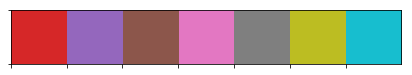

In [22]:
sns.palplot(sns.color_palette())

In [21]:
results = load_results(directory+'EW_goal_nogoal_cum_noMng.tar.gz')
exp, out = results

In [22]:
out.keys()

dict_keys(['TIME', 'Temperature Change from Preindustrial', 'Cumulative CO2 removal by weathering', 'Cumulative Cost of C Removal by EW', 'Cumulative basalt use', 'Cumulative olivine use'])

In [23]:
new_outcomes = {}
for key, value in out.items():
    if key not in ['TIME', 'Temperature Change from Preindustrial']:
        new_outcomes[key] = value[:, 100:201]/(1e+09)
    else:
        new_outcomes[key] = value[:, 100:201]


Temperature Change from Preindustrial


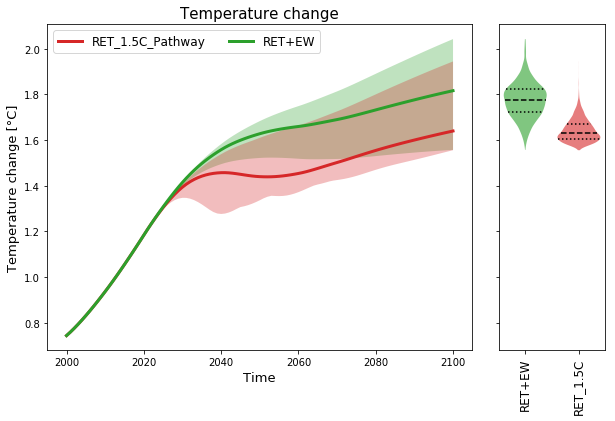

Cumulative CO2 removal by weathering


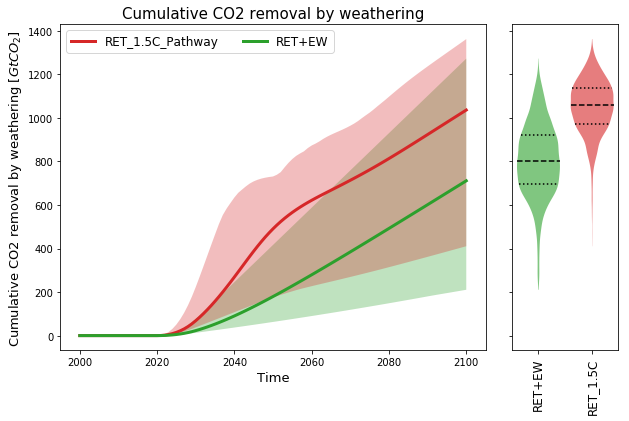

Cumulative Cost of C Removal by EW


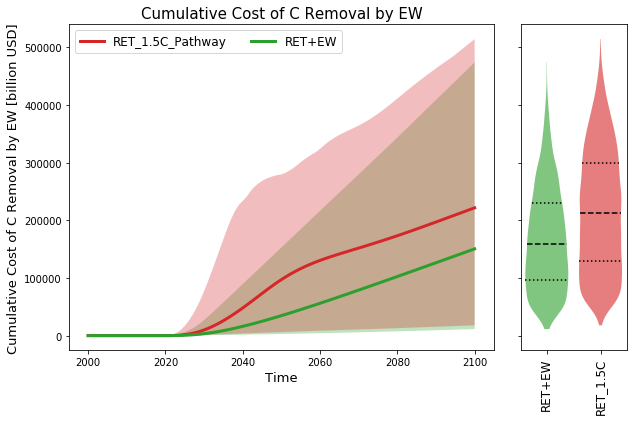

Cumulative basalt use


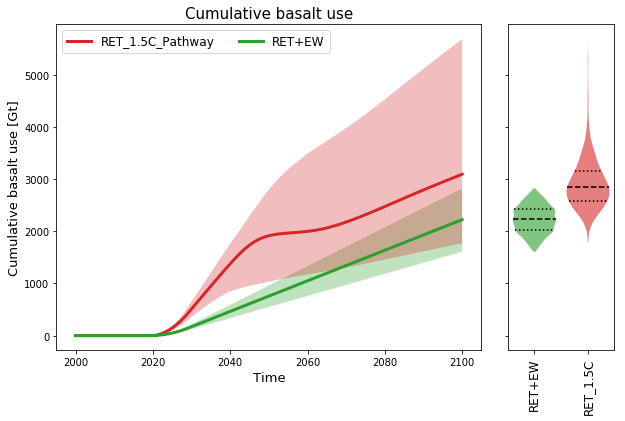

Cumulative olivine use


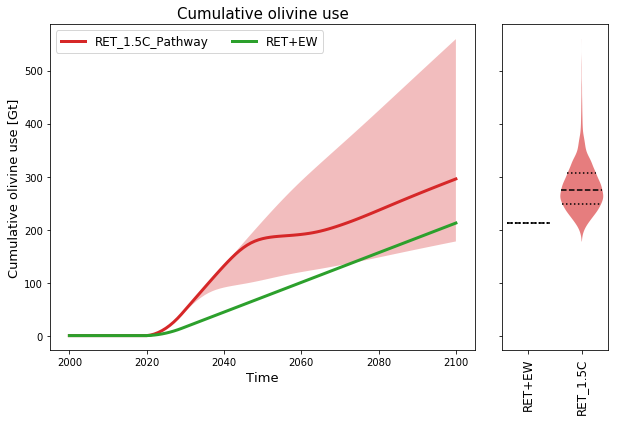

In [29]:
refs = {}
colors = {'RET_EW': sns.color_palette()[0], 
          'RET_EW_GoalSeeking': sns.color_palette()[1]}   
to_plot = ['Temperature Change from Preindustrial', 'Cumulative CO2 removal by weathering', 
           'Cumulative Cost of C Removal by EW', 'Cumulative basalt use', 'Cumulative olivine use']

yrs = np.arange(2000, 2101, 1)

for ooi in to_plot:
    
    fig, axes = envelopes(exp, new_outcomes, ooi, 
                          density=Density.VIOLIN, legend=False, fill=True, group_by='Goal Seeking Switch')
    fig.set_size_inches(10,6)
    print(ooi)
    
    for sc in ['RET_EW', 'RET_EW_GoalSeeking']:
        ref = df_ref[(df_ref['Variable']==ooi) & (df_ref['Scenario']==sc)].T
        ref = ref.drop(['Variable', 'Scenario'], axis=0)
        ref = ref.loc[yrs,]
        ref = ref.fillna(0)
        if ooi.startswith('Cumulative') or ooi.startswith('Basalt') or ooi.startswith('Olivine'):
            ref = ref/(1e+09) # ton to Gton
        refs[sc] = ref
    axes[ooi].plot(refs['RET_EW_GoalSeeking'], label='RET_1.5C_Pathway', lw=3, ls='-', color=colors['RET_EW_GoalSeeking'])
    axes[ooi].plot(refs['RET_EW'], label='RET+EW', lw=3, ls='-', color=colors['RET_EW'])
    
    
    #make_legend(grouping_labels, axes[ooi], alpha=0.6, legend_type=PATCH, ncol=2)
    axes[ooi].legend(ncol=2, loc='upper left', fontsize=12)
    
    axes[ooi].set_xlabel("Time", fontsize=13)
    axes['{}_density'.format(ooi)].set_xticks([0, 1])
    axes['{}_density'.format(ooi)].set_xticklabels(['RET+EW', 'RET_1.5C'], fontsize=12)
    axes[ooi].set_ylabel("{} [{}]".format(ylabels[ooi][0], ylabels[ooi][1]), fontsize=13)
    axes[ooi].set_title(ylabels[ooi][0], fontsize=15)
    plt.savefig(directory+'Envelopes_Pathways2_{}.png'.format(ooi), dpi=300,  bbox_inches='tight')

    plt.show()

In [32]:
ranges = pd.DataFrame(columns=['Ooi','Scenario', 'min', 'max', 'mean', 'median'] )
i = 0
for ooi in to_plot:
    for sc in [0, 1]:
        logicalindex = exp['Goal Seeking Switch'] == sc
        ranges.loc[i, 'Ooi'] = ooi
        ranges.loc[i, 'Scenario'] = sc
        ranges.loc[i, 'min'] = new_outcomes[ooi][logicalindex,-1].min()
        ranges.loc[i, 'max'] = new_outcomes[ooi][logicalindex,-1].max()
        ranges.loc[i, 'mean'] = new_outcomes[ooi][logicalindex,-1].mean()
        ranges.loc[i, 'median'] = np.median(new_outcomes[ooi][logicalindex,-1])
        i += 1

ranges.to_excel(directory+'Ranges_Goal_Seeking.xlsx')

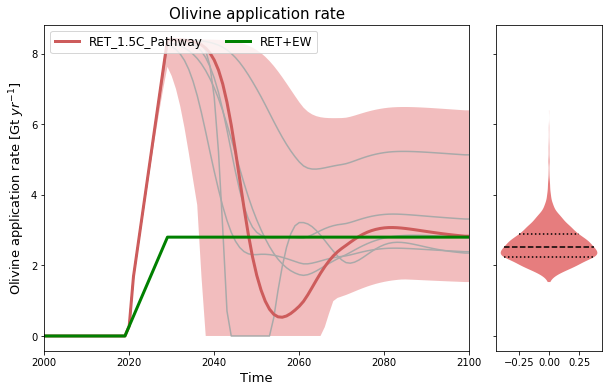

In [22]:
# BASALT APPLICATION PATHWAYS IN RED!
ooi = 'Olivine application rate'
log_index = exp_goal['Transition Scenario Switch']==2
exp_goal = exp_goal[log_index]
for key, value in new_outcomes_goal.items():
    new_outcomes_goal[key] = value[log_index, :]
refs = {}
colors = {'RET_EW': 'green', 
          'RET_EW_GoalSeeking': 'indianred'}  
yrs = np.arange(2000, 2101, 1)
indices = range(0, 5000)
to_select = 3
import random
selected_indices = random.sample(indices, to_select)+[4044, 1917]
fig, axes = plot_lines_with_envelopes(exp_goal, new_outcomes_goal, ooi, density=Density.VIOLIN, 
                                    experiments_to_show=selected_indices)
fig.set_size_inches(10,6)

for sc in ['RET_EW', 'RET_EW_GoalSeeking']:
        ref = df_ref[(df_ref['Variable']==ooi) & (df_ref['Scenario']==sc)].T
        ref = ref.drop(['Variable', 'Scenario'], axis=0)
        ref = ref.loc[yrs,]
        ref = ref.fillna(0)
        if ooi.startswith('Cumulative') or ooi.startswith('Basalt') or ooi.startswith('Olivine'):
            ref = ref/(1e+09) # ton to Gton
        refs[sc] = ref
axes[ooi].plot(refs['RET_EW_GoalSeeking'], label='RET_1.5C_Pathway', lw=3, ls='-', color=colors['RET_EW_GoalSeeking'])
axes[ooi].plot(refs['RET_EW'], label='RET+EW', lw=3, ls='-', color=colors['RET_EW'])

axes[ooi].legend(ncol=2, loc='upper left', fontsize=12)
    
axes[ooi].set_xlabel("Time", fontsize=13)
#axes['{}_density'.format(ooi)].set_xticks([0, 1])
#axes['{}_density'.format(ooi)].set_xticklabels(['RET+EW', 'RET_1.5C'], fontsize=12)
axes[ooi].set_ylabel("{} [{}]".format(ylabels[ooi][0], ylabels[ooi][1]), fontsize=13)
axes[ooi].set_title(ylabels[ooi][0], fontsize=15)
plt.savefig(directory+'Envelopes_Pathways5_{}.png'.format(ooi), dpi=300,  bbox_inches='tight')
plt.show()

In [15]:
np.median(new_outcomes_goal['Basalt application rate'][:, -1])

26.177129472

In [16]:
np.mean(new_outcomes_goal['Basalt application rate'][:, -1])

27.016082652774394

In [17]:
new_outcomes_goal['Basalt application rate'][:, -1].mean()

27.016082652774394

In [18]:
np.mean(new_outcomes_goal['Olivine application rate'][:, -1])

2.6017957915136

In [5]:
results = load_results(directory+'EW_goal_nogoal_perha.tar.gz')
exp, out = results

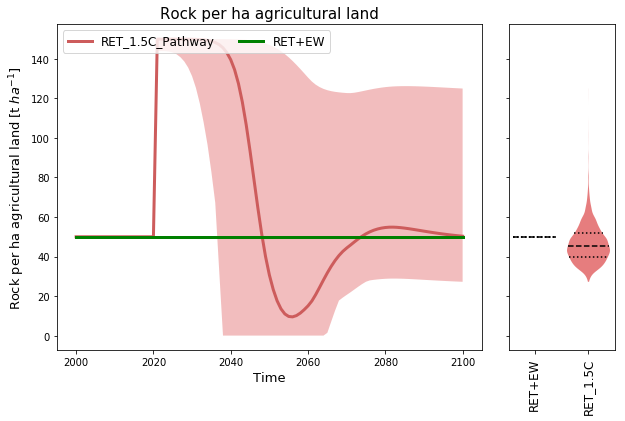

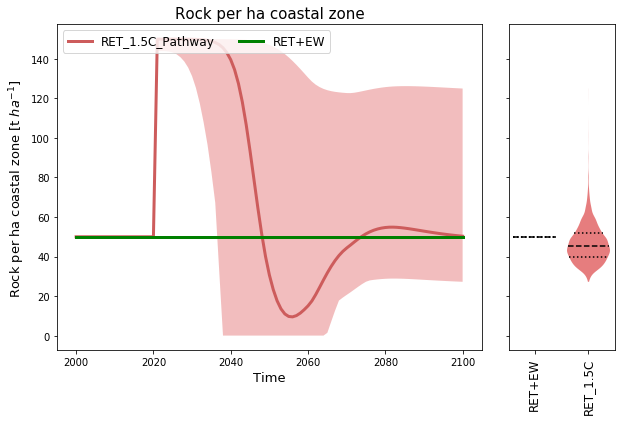

In [24]:
new_outcomes = {}
for key, value in out.items():
    new_outcomes[key] = value[:, 100:201]

refs = {}
colors = {'RET_EW': 'green', 
          'RET_EW_GoalSeeking': 'indianred'}   
to_plot = ['Rock per ha agricultural land', 'Rock per ha coastal zone',]

ylabels = {'Rock per ha agricultural land' : ('Rock per ha agricultural land', 't $ha^{-1}$'),
          'Rock per ha coastal zone' : ('Rock per ha coastal zone', 't $ha^{-1}$')}

yrs = np.arange(2000, 2101, 1)

for ooi in to_plot:
    
    fig, axes = envelopes(exp, new_outcomes, ooi, 
                          density=Density.VIOLIN, legend=False, fill=True, group_by='Goal Seeking Switch')
    fig.set_size_inches(10,6)
    indices = range(0, 5000)
    to_select = 3
    import random
    selected_indices = random.sample(indices, to_select)+[4044, 1917]
    for i in selected_indices:
        #axes[ooi].plot(x=yrs, y=new_outcomes[ooi][i, :], lw=5, ls='-', color='grey')
        axes[ooi].plot(x=new_outcomes['TIME'][i, :], y=new_outcomes[ooi][i, :])
    
    for sc in ['RET_EW', 'RET_EW_GoalSeeking']:
        ref = df_ref[(df_ref['Variable']==ooi) & (df_ref['Scenario']==sc)].T
        ref = ref.drop(['Variable', 'Scenario'], axis=0)
        ref = ref.loc[yrs,]
        ref = ref.fillna(0)
        if ooi.startswith('Cumulative') or ooi.startswith('Basalt') or ooi.startswith('Olivine'):
            ref = ref/(1e+09) # ton to Gton
        refs[sc] = ref
    axes[ooi].plot(refs['RET_EW_GoalSeeking'], label='RET_1.5C_Pathway', lw=3, ls='-', color=colors['RET_EW_GoalSeeking'])
    axes[ooi].plot(refs['RET_EW'], label='RET+EW', lw=3, ls='-', color=colors['RET_EW'])
    
    
    #make_legend(grouping_labels, axes[ooi], alpha=0.6, legend_type=PATCH, ncol=2)
    axes[ooi].legend(ncol=2, loc='upper left', fontsize=12)
    
    axes[ooi].set_xlabel("Time", fontsize=13)
    axes['{}_density'.format(ooi)].set_xticks([0, 1])
    axes['{}_density'.format(ooi)].set_xticklabels(['RET+EW', 'RET_1.5C'], fontsize=12)
    axes[ooi].set_ylabel("{} [{}]".format(ylabels[ooi][0], ylabels[ooi][1]), fontsize=13)
    axes[ooi].set_title(ylabels[ooi][0], fontsize=15)
    plt.savefig(directory+'Envelopes_Pathways2_{}.png'.format(ooi), dpi=300,  bbox_inches='tight')

    plt.show()


In [11]:
for ooi in to_plot:
    print(ooi)
    print(new_outcomes[ooi][:,-1].min())
    print(new_outcomes[ooi][:,-1].mean())
    print(new_outcomes[ooi][:,-1].max())

Rock per ha agricultural land
27.220844268798828
48.17664466819763
124.99266052246094
Rock per ha coastal zone
27.220844268798828
48.17664466819763
124.99266052246094


In [108]:
np.where(new_outcomes_goal['Basalt application rate'][:, -40]-new_outcomes_goal['Basalt application rate'][:, -1] >= 10)

(array([1917], dtype=int64),)